# Time series analysis of electricity usage

So Cal Edison provides hour-by-hour power consumption for its customers. Let's explore using Python, Pandas and Plotly. Use Statsmodels to build AutoRegressive model and predict usage. Use Statsmodels evaluation tools to plot and measure prediction results.

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import re

In [80]:
# Load usage from excel
xlsxpath = "E:/UserLo/source/repos/learning/SCEdison/"
xlsx = "SCE_Usage_8000272817_04-01-21_to_04-01-22.xlsx"
energy_usage = "SCEUsageClean"

energy_usage_df = pd.read_excel(xlsxpath+xlsx,sheet_name=energy_usage)
energy_usage_df.rename(columns={'Energy   Consumption  time period':'energy_consumption_time_period','Usage in kilowatt-hours':'usage_in_kilowatt_hours'},inplace=True)
energy_usage_df.head()

,energy_consumption_time_period,usage_in_kilowatt_hours
0,2021-04-01 00:00:00 to 2021-04-01 01:00:00,0.46
1,2021-04-01 01:00:00 to 2021-04-01 02:00:00,0.33
2,2021-04-01 02:00:00 to 2021-04-01 03:00:00,0.24
3,2021-04-01 03:00:00 to 2021-04-01 04:00:00,0.26
4,2021-04-01 04:00:00 to 2021-04-01 05:00:00,0.25


In [7]:
energy_usage_df.dtypes

Energy   Consumption  time period     object
Usage in kilowatt-hours              float64
dtype: object

Note that the string format for energy_consumption_time_period contains a \xa0 character (unicode non-breaking space) before the word 'to', however, the regex '\s' handles it correctly has whitespace.

In [45]:
energy_usage_df.iloc[0,0]

'2021-04-01 00:00:00\xa0to 2021-04-01 01:00:00'

### Split the energy_consumption_time_period

Split energy_consumption_time_period into start_dttm and end_dttm and concat

Try it first with just the head.

In [4]:
# Try one
# Split text column "Energy Consumption time period" into start_dt and end_dt
splitregex = re.compile('\sto\s')
start, end = splitregex.split(energy_usage_df.iloc[0,0])
print(f'{start=} {end=}')

start='2021-04-01 00:00:00' end='2021-04-01 01:00:00'


In [36]:
ehead_df = energy_usage_df.head()
ehead_df

,energy_consumption_time_period,usage_in_kilowatt_hours
0,2021-04-01 00:00:00 to 2021-04-01 01:00:00,0.46
1,2021-04-01 01:00:00 to 2021-04-01 02:00:00,0.33
2,2021-04-01 02:00:00 to 2021-04-01 03:00:00,0.24
3,2021-04-01 03:00:00 to 2021-04-01 04:00:00,0.26
4,2021-04-01 04:00:00 to 2021-04-01 05:00:00,0.25


In [50]:
ehead_df['energy_consumption_time_period'].str.split(pat=splitregex,expand=True).rename(columns={0:'start_dttm',1:'end_dttm'})

,start_dttm,end_dttm
0,2021-04-01 00:00:00,2021-04-01 01:00:00
1,2021-04-01 01:00:00,2021-04-01 02:00:00
2,2021-04-01 02:00:00,2021-04-01 03:00:00
3,2021-04-01 03:00:00,2021-04-01 04:00:00
4,2021-04-01 04:00:00,2021-04-01 05:00:00


In [ ]:
ehead_df = pd.concat([ehead_df,\
    ehead_df['energy_consumption_time_period'].str.split(pat=splitregex,expand=True).rename(columns={0:'start_dttm',1:'end_dttm'})], axis=1)
ehead_df

In [55]:
ehead_df.dtypes

energy_consumption_time_period     object
usage_in_kilowatt_hours           float64
start_dttm                         object
end_dttm                           object
dtype: object

In [69]:
# Change the data types of the dttm columns
ehead_df = ehead_df.astype({'start_dttm':'datetime64','end_dttm':'datetime64'})
ehead_df.dtypes

energy_consumption_time_period            object
usage_in_kilowatt_hours                  float64
start_dttm                        datetime64[ns]
end_dttm                          datetime64[ns]
dtype: object

In [114]:
# Day of week starts on Monday = 0
ehead_df.loc[0,'start_dttm'].day_of_week

3

### Perform split on entire DataFrame

It works on a sample, let's do the entire energy_usage_df.

In [82]:
energy_usage_df = pd.concat([energy_usage_df,\
    energy_usage_df['energy_consumption_time_period'].str.split(pat=splitregex,expand=True).rename(columns={0:'start_dttm',1:'end_dttm'})], axis=1)

energy_usage_df.head()

,energy_consumption_time_period,usage_in_kilowatt_hours,start_dttm,end_dttm
0,2021-04-01 00:00:00 to 2021-04-01 01:00:00,0.46,2021-04-01 00:00:00,2021-04-01 01:00:00
1,2021-04-01 01:00:00 to 2021-04-01 02:00:00,0.33,2021-04-01 01:00:00,2021-04-01 02:00:00
2,2021-04-01 02:00:00 to 2021-04-01 03:00:00,0.24,2021-04-01 02:00:00,2021-04-01 03:00:00
3,2021-04-01 03:00:00 to 2021-04-01 04:00:00,0.26,2021-04-01 03:00:00,2021-04-01 04:00:00
4,2021-04-01 04:00:00 to 2021-04-01 05:00:00,0.25,2021-04-01 04:00:00,2021-04-01 05:00:00


In [74]:
energy_usage_df.dtypes

energy_consumption_time_period     object
usage_in_kilowatt_hours           float64
start_dttm                         object
end_dttm                           object
dtype: object

In [84]:
# Change the data types of the dttm columns
energy_usage_df = energy_usage_df.astype({'start_dttm':'datetime64','end_dttm':'datetime64'})
energy_usage_df.dtypes

energy_consumption_time_period            object
usage_in_kilowatt_hours                  float64
start_dttm                        datetime64[ns]
end_dttm                          datetime64[ns]
dtype: object

### Let's see a fine-grained look of the usage over the 12 months

Can clearly see blocks of time with low power usage while I was away on vacation.

In [105]:
# On the finest grain level, show the hour-by-hour usage over the 12 months
fig=px.line(energy_usage_df,x='start_dttm',y='usage_in_kilowatt_hours')
fig.update_traces(line={'color':'darksalmon'})
fig.show()

In [85]:
energy_usage_df['start_dt'] = energy_usage_df['start_dttm'].apply(lambda date: date.floor(freq='D'))

In [86]:
energy_usage_df['start_day'] = energy_usage_df['start_dttm'].apply(lambda date: date.day_of_week)
energy_usage_df.head()

,energy_consumption_time_period,usage_in_kilowatt_hours,start_dttm,end_dttm,start_dt,start_day
0,2021-04-01 00:00:00 to 2021-04-01 01:00:00,0.46,2021-04-01 00:00:00,2021-04-01 01:00:00,2021-04-01,3
1,2021-04-01 01:00:00 to 2021-04-01 02:00:00,0.33,2021-04-01 01:00:00,2021-04-01 02:00:00,2021-04-01,3
2,2021-04-01 02:00:00 to 2021-04-01 03:00:00,0.24,2021-04-01 02:00:00,2021-04-01 03:00:00,2021-04-01,3
3,2021-04-01 03:00:00 to 2021-04-01 04:00:00,0.26,2021-04-01 03:00:00,2021-04-01 04:00:00,2021-04-01,3
4,2021-04-01 04:00:00 to 2021-04-01 05:00:00,0.25,2021-04-01 04:00:00,2021-04-01 05:00:00,2021-04-01,3


Sum the usage by date and plot it

In [70]:
energy_usage_daily_df = energy_usage_df.groupby("start_dt").sum()
energy_usage_daily_df.head()

,usage_in_kilowatt_hours
start_dt,
2021-04-01,10.45
2021-04-02,10.43
2021-04-03,10.15
2021-04-04,13.07
2021-04-05,12.20


Rather than using the lambda function to create a new start_dt column, the groupby could have used the dt accessor.

Note: df.groupby('A') is just syntactic sugar for df.groupby(df['A').

In [121]:
energy_usage_daily_dfx = energy_usage_df.groupby(energy_usage_df["start_dttm"].dt.date).sum()
energy_usage_daily_dfx.head(5)

,usage_in_kilowatt_hours,start_day
start_dttm,,
2021-04-01,10.45,72
2021-04-02,10.43,96
2021-04-03,10.15,120
2021-04-04,13.07,144
2021-04-05,12.20,0


Use resample to do the same thing. 

List of frequency aliases: https://pandas.pydata.org/docs/user_guide/timeseries.html#offset-aliases

In [160]:

energy_usage_day_of_week_dfxx = energy_usage_df.resample('D', on='start_dttm').sum()
energy_usage_day_of_week_dfxx.head()

,usage_in_kilowatt_hours,start_day
start_dttm,,
2021-04-01,10.45,72
2021-04-02,10.43,96
2021-04-03,10.15,120
2021-04-04,13.07,144
2021-04-05,12.20,0


In [72]:
fig=px.line(energy_usage_daily_df,y='usage_in_kilowatt_hours')
fig.update_traces(line={'color':'darksalmon'})
fig.show()

Compute day of week usage and normalized day of week usage and plot it

In [87]:
energy_usage_day_of_week_df = energy_usage_df.groupby("start_day").sum()
energy_usage_day_of_week_df.head()

,usage_in_kilowatt_hours
start_day,
0,520.49
1,533.92
2,520.35
3,531.22
4,529.23


Same thing using dt accessor

See:
https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html?highlight=frequency

In [103]:
energy_usage_day_of_week_dfx = energy_usage_df.groupby(energy_usage_df["start_dttm"].dt.day_of_week).sum()
energy_usage_day_of_week_dfx.head(20)

,usage_in_kilowatt_hours,start_day
start_dttm,,
0,520.49,0
1,533.92,1248
2,520.35,2496
3,531.22,3816
4,529.23,5088
5,519.08,6240
6,513.94,7488


In [88]:
mean_day_usage = energy_usage_day_of_week_df['usage_in_kilowatt_hours'].mean()
energy_usage_day_of_week_df['usage_diff']= energy_usage_day_of_week_df['usage_in_kilowatt_hours']-mean_day_usage
energy_usage_day_of_week_df.head()

,usage_in_kilowatt_hours,usage_diff
start_day,,
0,520.49,-3.542857
1,533.92,9.887143
2,520.35,-3.682857
3,531.22,7.187143
4,529.23,5.197143


In [90]:
energy_usage_day_of_week_df.index=energy_usage_day_of_week_df.index.map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

In [91]:
energy_usage_day_of_week_df

,usage_in_kilowatt_hours,usage_diff
start_day,,
Monday,520.49,-3.542857
Tuesday,533.92,9.887143
Wednesday,520.35,-3.682857
Thursday,531.22,7.187143
Friday,529.23,5.197143
Saturday,519.08,-4.952857
Sunday,513.94,-10.092857


In [93]:
fig=px.bar(energy_usage_day_of_week_df,y='usage_diff')
#fig.update_traces(line={'color':'darksalmon'})
fig.show()

Make a new index combining year and month

In [118]:
yr_month_idx = energy_usage_daily_df.index.year.astype('str') + energy_usage_daily_df.index.month_name()
yr_month_idx

Index(['2021April', '2021April', '2021April', '2021April', '2021April',
       '2021April', '2021April', '2021April', '2021April', '2021April',
       ...
       '2022March', '2022March', '2022March', '2022March', '2022March',
       '2022March', '2022March', '2022March', '2022March', '2022April'],
      dtype='object', name='start_dt', length=366)

In [122]:
energy_usage_daily_df.index = yr_month_idx
energy_usage_daily_df.head()

,usage_in_kilowatt_hours
start_dt,
2021April,10.45
2021April,10.43
2021April,10.15
2021April,13.07
2021April,12.20


Find the unique values which will then be used as columns in new DF that has day number as index and YrMonth as columns

In [139]:
unique_yr_month = yr_month_idx.unique()
unique_yr_month_lst = unique_yr_month.to_list()


Create an empty dataframe,energy_usage_daily_by_yr_df, and populate it with the daily usage for each yr month

In [129]:
energy_usage_daily_by_yr_df = pd.DataFrame(index=range(0,31,1))

In [140]:
for yr_mo in unique_yr_month_lst:
    energy_usage_daily_by_yr_df = pd.concat([energy_usage_daily_by_yr_df,energy_usage_daily_df.loc[yr_mo].reset_index(drop=True)],axis=1).\
        rename(columns={'usage_in_kilowatt_hours':yr_mo})

In [141]:
energy_usage_daily_by_yr_df.head()

,2021April,2021May,2021June,2021July,2021August,2021September,2021October,2021November,2021December,2022January,2022February,2022March,2022April
0,10.45,10.26,10.34,9.24,10.26,6.43,10.34,12.07,13.53,9.86,11.82,9.97,9.95
1,10.43,10.85,10.34,9.68,9.07,8.35,10.67,10.50,15.24,9.63,10.34,8.93,NaN
2,10.15,10.39,10.16,9.73,10.47,9.38,10.93,8.78,11.17,11.22,9.14,9.43,NaN
3,13.07,10.19,10.43,8.70,9.13,10.77,11.02,8.72,14.73,11.98,10.54,11.25,NaN
4,12.20,10.91,9.39,9.61,10.19,11.63,10.14,9.91,11.02,10.06,10.17,7.65,NaN


In [142]:
energy_usage_daily_by_yr_df.tail()

,2021April,2021May,2021June,2021July,2021August,2021September,2021October,2021November,2021December,2022January,2022February,2022March,2022April
26,11.48,9.79,9.39,8.49,6.31,9.27,9.43,11.22,12.15,11.57,9.73,10.42,NaN
27,11.53,10.33,10.30,9.13,6.30,8.96,9.51,12.82,9.25,10.03,9.79,11.45,NaN
28,10.38,10.09,9.16,9.52,6.51,9.76,9.75,9.84,10.17,10.77,NaN,11.54,NaN
29,9.61,10.70,10.25,10.54,6.26,9.89,9.15,10.34,9.46,9.94,NaN,9.73,NaN
30,NaN,9.55,NaN,10.08,6.30,NaN,10.14,NaN,9.50,11.42,NaN,10.50,NaN


In [145]:
# April2022 is almost empty so drop it
energy_usage_daily_by_yr_df.drop("2022April",axis=1,inplace=True)
energy_usage_daily_by_yr_df.head()

,2021April,2021May,2021June,2021July,2021August,2021September,2021October,2021November,2021December,2022January,2022February,2022March
0,10.45,10.26,10.34,9.24,10.26,6.43,10.34,12.07,13.53,9.86,11.82,9.97
1,10.43,10.85,10.34,9.68,9.07,8.35,10.67,10.50,15.24,9.63,10.34,8.93
2,10.15,10.39,10.16,9.73,10.47,9.38,10.93,8.78,11.17,11.22,9.14,9.43
3,13.07,10.19,10.43,8.70,9.13,10.77,11.02,8.72,14.73,11.98,10.54,11.25
4,12.20,10.91,9.39,9.61,10.19,11.63,10.14,9.91,11.02,10.06,10.17,7.65


In [150]:
energy_usage_daily_by_yr_corr_df = energy_usage_daily_by_yr_df.corr()

The daily pattern of monthly usage is not correlated with other months

In [151]:
energy_usage_daily_by_yr_corr_df

,2021April,2021May,2021June,2021July,2021August,2021September,2021October,2021November,2021December,2022January,2022February,2022March
2021April,1.000000,0.066363,0.315330,-0.282603,0.344498,0.359151,0.094096,-0.268932,0.041724,0.039274,-0.108407,-0.215544
2021May,0.066363,1.000000,-0.182336,0.007029,0.268117,0.108112,0.125422,-0.420754,0.308672,-0.296321,-0.071376,-0.209343
2021June,0.315330,-0.182336,1.000000,0.138705,0.261798,-0.135785,0.053265,0.132070,-0.240375,-0.031214,-0.130956,-0.280241
2021July,-0.282603,0.007029,0.138705,1.000000,0.122319,0.201703,0.153141,-0.051173,-0.268910,-0.095891,-0.257968,-0.221055
2021August,0.344498,0.268117,0.261798,0.122319,1.000000,0.225812,0.264025,-0.387684,-0.038160,-0.217930,-0.436067,-0.640685
2021September,0.359151,0.108112,-0.135785,0.201703,0.225812,1.000000,0.248102,-0.301951,-0.169006,-0.062995,-0.371026,-0.411744
2021October,0.094096,0.125422,0.053265,0.153141,0.264025,0.248102,1.000000,0.034061,-0.222123,-0.093852,0.159529,-0.418422
2021November,-0.268932,-0.420754,0.132070,-0.051173,-0.387684,-0.301951,0.034061,1.000000,-0.204862,-0.008417,0.149814,0.105483
2021December,0.041724,0.308672,-0.240375,-0.268910,-0.038160,-0.169006,-0.222123,-0.204862,1.000000,0.097943,0.378976,0.531332
2022January,0.039274,-0.296321,-0.031214,-0.095891,-0.217930,-0.062995,-0.093852,-0.008417,0.097943,1.000000,0.233010,0.313663


Plot autocorrelation and partial correlation for 2021April and 2021May.

Clearly shows that there is basically no correlation for daily energy values on a monthly scale.

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import statsmodels.tools.eval_measures as stat_tool

In [192]:
fig=px.line(energy_usage_daily_by_yr_df,y='2021April', markers=True)
fig.update_traces(line={'color':'darksalmon'})
fig.show()

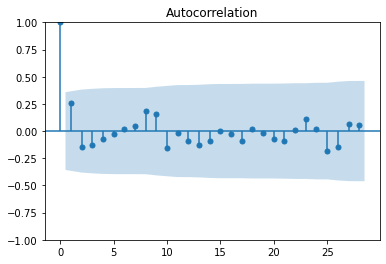

In [183]:
lags = 28
smt.graphics.plot_acf(energy_usage_daily_by_yr_df['2021April'].dropna(), lags=lags)
plt.show()

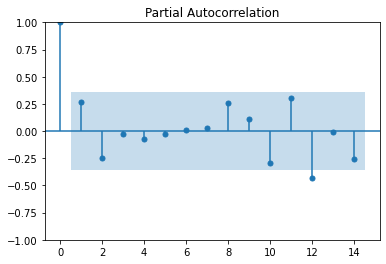

In [186]:
plags = 14
smt.graphics.plot_pacf(energy_usage_daily_by_yr_df['2021April'].dropna(), lags=plags)
plt.show()

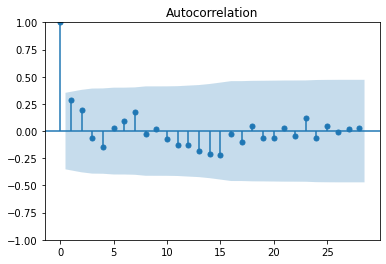

In [189]:
lags = 28
smt.graphics.plot_acf(energy_usage_daily_by_yr_df['2021May'].dropna(), lags=lags)
plt.show()

c:\Users\Lloyd\.conda\envs\IBMDS3-10-4\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



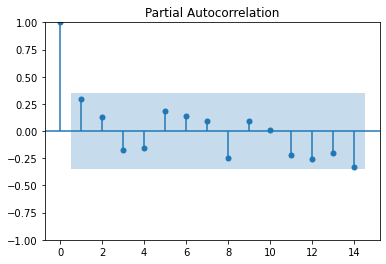

In [190]:
plags = 14
smt.graphics.plot_pacf(energy_usage_daily_by_yr_df['2021May'].dropna(), lags=plags)
plt.show()

Build Autoregressive model using energy_usage_df 4/1/2021 - 6/30/2021 and try to predict energy usage.

First, select the training data time period and resample the houly data to daily data.

In [207]:
energy_usage_hourly_4_6_df = energy_usage_df[(energy_usage_df.loc[:,'start_dttm']>=pd.Timestamp("2021-04-01 00:00:00")) & \
    (energy_usage_df.loc[:,'start_dttm']<pd.Timestamp("2021-07-01 00:00:00"))]

In [212]:
energy_usage_daily_4_6_df = energy_usage_hourly_4_6_df[['usage_in_kilowatt_hours','start_dttm']].groupby(energy_usage_hourly_4_6_df['start_dttm'].dt.date).sum()

In [213]:
energy_usage_daily_4_6_df.head()

,usage_in_kilowatt_hours
start_dttm,
2021-04-01,10.45
2021-04-02,10.43
2021-04-03,10.15
2021-04-04,13.07
2021-04-05,12.20


In [214]:
energy_usage_daily_4_6_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 2021-04-01 to 2021-06-30
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   usage_in_kilowatt_hours  91 non-null     float64
dtypes: float64(1)
memory usage: 1.4+ KB


Now fit a model to it. We'll use a simple AutoRegression model.

In [222]:
AR_model = AutoReg(energy_usage_daily_4_6_df, 7, old_names=False)
AR_result = AR_model.fit()
print(AR_result.summary())

                               AutoReg Model Results                               
Dep. Variable:     usage_in_kilowatt_hours   No. Observations:                   91
Model:                          AutoReg(7)   Log Likelihood                 -91.076
Method:                    Conditional MLE   S.D. of innovations              0.716
Date:                     Tue, 24 May 2022   AIC                            200.152
Time:                             08:16:05   BIC                            222.029
Sample:                         04-08-2021   HQIC                           208.946
                              - 06-30-2021                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.3601      1.462      1.615      0.106      -0.504       5.225
usage_in_kilowatt_hours.L1     0.2627      

c:\Users\Lloyd\.conda\envs\IBMDS3-10-4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Get actual usage for July 2021 and predicted usage for the same period so they can be compared.

In [ ]:
energy_usage_hourly_7_df = energy_usage_df[(energy_usage_df.loc[:,'start_dttm']>=pd.Timestamp("2021-07-01 00:00:00")) & \
    (energy_usage_df.loc[:,'start_dttm']<pd.Timestamp("2021-08-01 00:00:00"))]
energy_usage_daily_7_df = energy_usage_hourly_7_df[['usage_in_kilowatt_hours','start_dttm']].groupby(energy_usage_hourly_7_df['start_dttm'].dt.date).sum()


In [ ]:
forecast_results = AR_result.forecast(31)
forecast_results.rename('forecast', inplace=True)

In [252]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=energy_usage_daily_7_df.index,y=energy_usage_daily_7_df['usage_in_kilowatt_hours'],
            mode='lines+markers',name='Actual Usage'))


fig.add_trace(go.Scatter(x=forecast_results.index,y=forecast_results,
            mode='lines+markers',name='Predicted Usage'))

fig.show()

Let's see some details on the model. The actual does fall within the 95% confidence band all the way until July 23 when one day the usage was lower. The prediction is good for about 20 days with a Mean Squared Error of 0.3042 kilowatt-hours.

In [264]:
mse = stat_tool.mse(energy_usage_daily_7_df['usage_in_kilowatt_hours'],forecast_results)
mse_20 = stat_tool.mse(energy_usage_daily_7_df['usage_in_kilowatt_hours'][0:19],forecast_results[0:19])
print(f'MSE for 31 days: {mse:0.4f}, MSE for 20 days: {mse_20:0.4f}')

MSE for 31 days: 0.6566, MSE for 20 days: 0.3042


c:\Users\Lloyd\.conda\envs\IBMDS3-10-4\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

C:\Users\Lloyd\AppData\Local\Temp\ipykernel_14744\3466503042.py:2: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



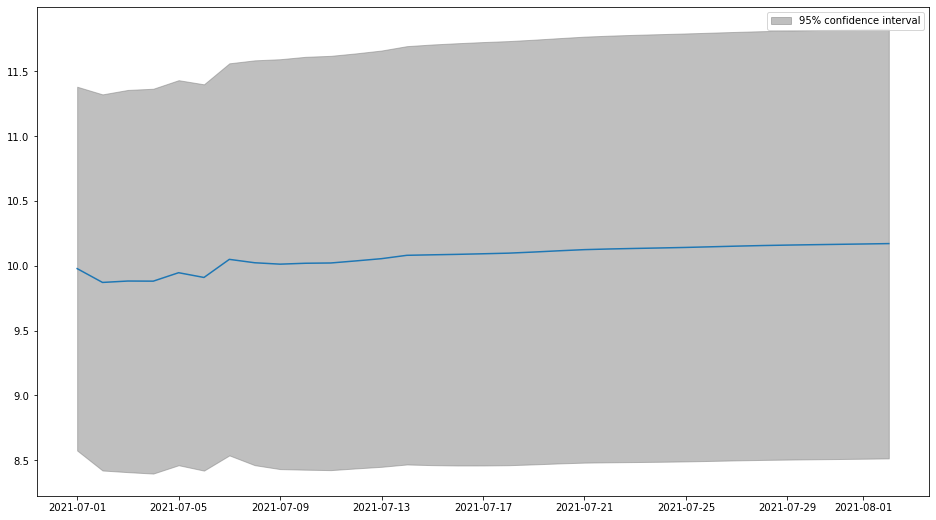

In [253]:
fig = AR_result.plot_predict(91, 123,figsize=(16, 9))
fig.show()

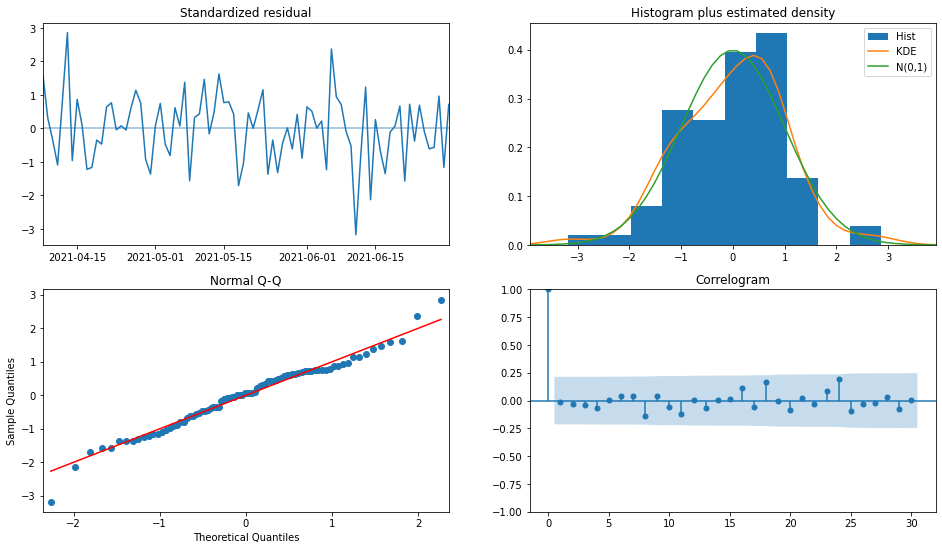

In [225]:
fig = plt.figure(figsize=(16, 9))
fig = AR_result.plot_diagnostics(fig=fig, lags=30)